# CNN 이론

## CNN 구조

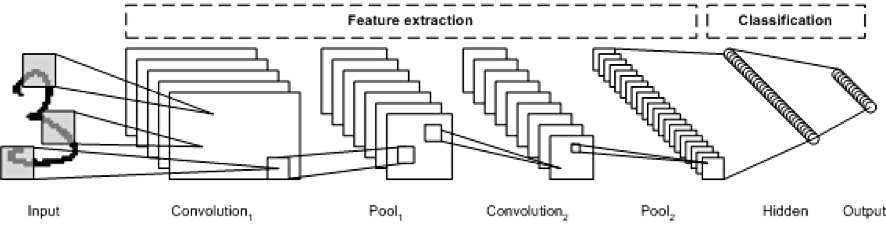
- 출처: http://taewan.kim/post/cnn/

- 이미지의 특징을 추출하는 부분과 클래스를 분류하는 부분이 존재
1. 특징 추출 영역 
 - Convolution Layer : 필터를 통해 이미지의 특징을 추출
 - Pooling Layer : 특징을 강화시키고 이미지의 크기를 줄임 
2. 클래스 분류 영역
 - CNN 마지막 부분에는 이미지 분류를 위한 Fully Connected 레이어가 추가 
 - Flatten Layer : 데이터 타입을 FC네트워크 형태로 변경. 입력데이터의 shape 변경만 수행

CNN은 이미지 특징 추출을 위하여 같이 입력데이터를 필터가 순회하며 합성곱을 계산하고, 그 계산 결과를 이용하여 Feature map을 만듭니다. Convolution Layer는 Filter 크기, Stride, Padding 적용 여부, Max Pooling 크기에 따라서 출력 데이터의 Shape이 변경됩니다.

## 왜 CNN인가?
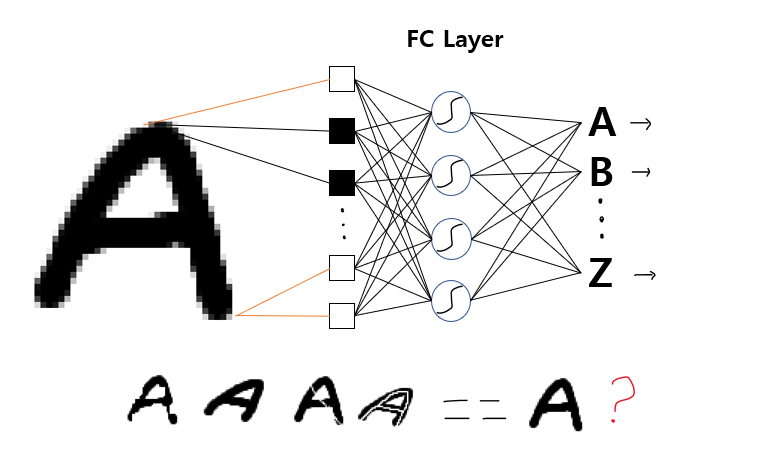
- https://gruuuuu.github.io/machine-learning/cnn-doc/#

- CNN이 나오기 이전, 이미지 인식은 2차원으로 된 이미지(채널까지 포함해서 3차원)를 1차원배열로 바꾼 뒤 FC(Fully Connected)신경망으로 학습시키는 방법
- 단점
 1.  이미지의 형상은 고려하지 않고, raw data를 직접 처리하기 때문에 많은 양의 학습데이터가 필요하고 학습시간이 길어짐.
 2. 미지가 회전하거나 움직이면 새로운 입력으로 데이터를 처리해함. 이미지의 특성을 이해하지 못하고 단순 1D데이터로 보고 학습을하는것
 3. 이미지 데이터를 평면화 시키는 과정에서 공간정보가 손실됨. 즉, 신경망이 특징을 추출하고 학습하는데 있어 비효율적이고 정확도를 높이는데 한계

→ 이미지의 공간정보를 유지한채 학습하는 모델이 필요 : CNN


### CNN과 기존방법의 차이점
- 각 레이어의 입출력 데이터의 형상 유지
- 이미지의 공간 정보를 유지하면서 인접 이미지와의 특징을 효과적으로 인식
- 복수의 필터로 이미지의 특징 추출 및 학습
- 추출한 이미지의 특징을 모으고 강화하는 Pooling 레이어
- 필터를 공유 파라미터로 사용하기 때문에, 일반 인공 신경망과 비교하여 학습 - 파라미터가 매우 적음

## 기본 용어

### 1. Convolution

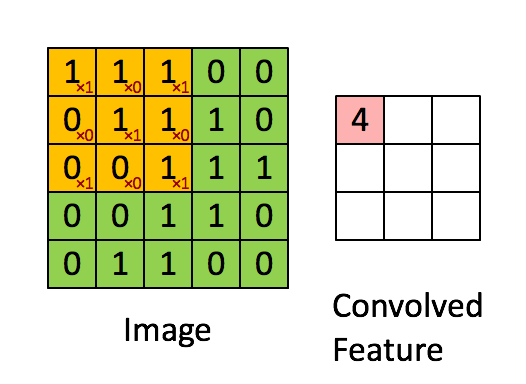

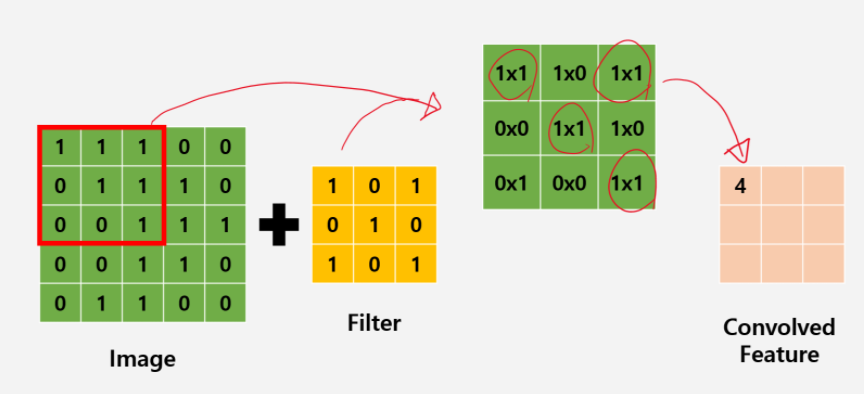

- 합성곱 연산 : 두 함수 f, g 가운데 하나의 함수를 반전(reverse), 전이(shift)시킨 다음, 다른 하나의 함수와 곱한 결과를 적분하는 것
- 합성곱 처리 결과로 부터 Feature Map

### 2. Channel
- Convolution Layer에 유입되는 입력 데이터에는 한 개 이상의 필터가 적용
- 컬러 사진은 천연색을 표현하기 위해서, 각 픽셀을 RGB 3개의 실수로 표현한 3차원 데이터
- 우리가 보통 생각하는 color이미지는 red채널, blue채널, green채널이 합쳐진 이미지
- Convolution Layer에 n개의 필터가 적용된다면 출력 데이터는 n개의 채널

### 3.filter & stride

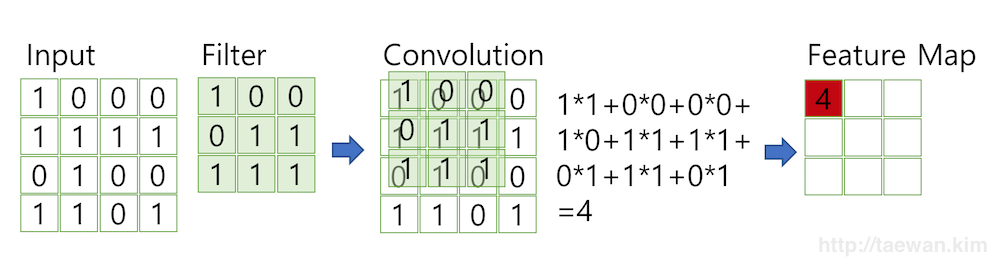

- 필터 : 이미지의 특징을 찾아내기 위한 공용 파라미터
- 이미지 처리에서는 sobel필터와같이 유명한 필터들을 직접 사용자가 찾아서 사용해야했지만, CNN은 신경망에서 학습을 통해 자동으로 적합한 필터를 생성해 준다는 것
- Stride : Filter를 몇 칸 이동할건지 정함

### 4. padding
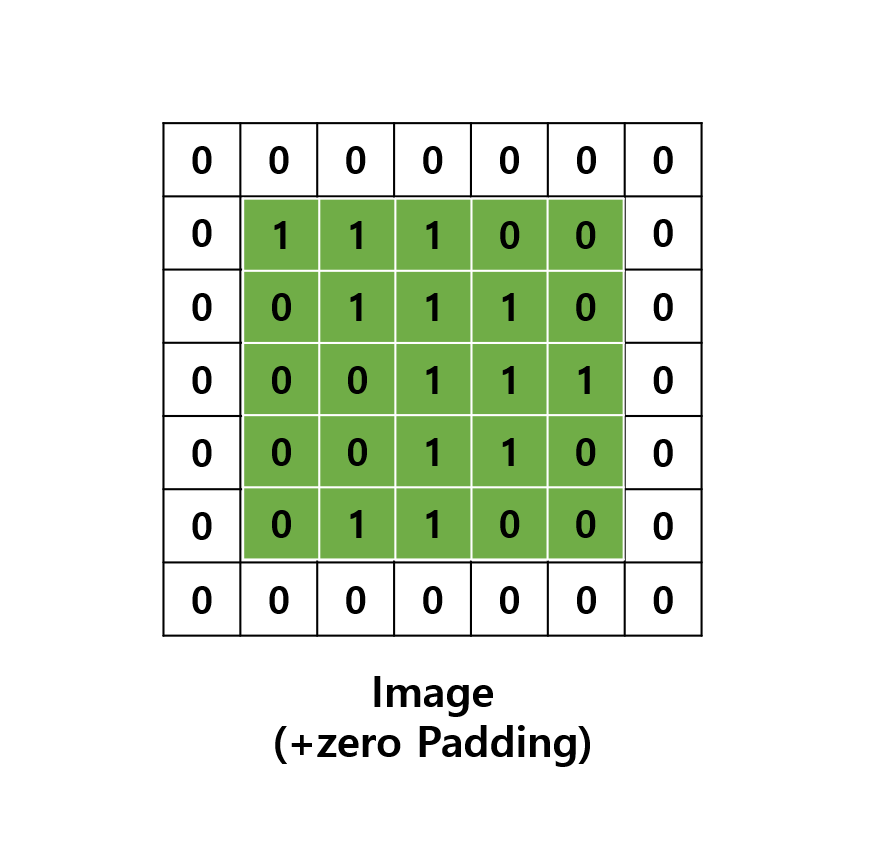

- 입력 데이터의 외각에 지정된 픽셀만큼 특정 값으로 채워 넣는 것
- 입력데이터보다 출력데이터가 작아지는것을 방지하는 방법
- 주로 zero padding을 사용

### Pooling
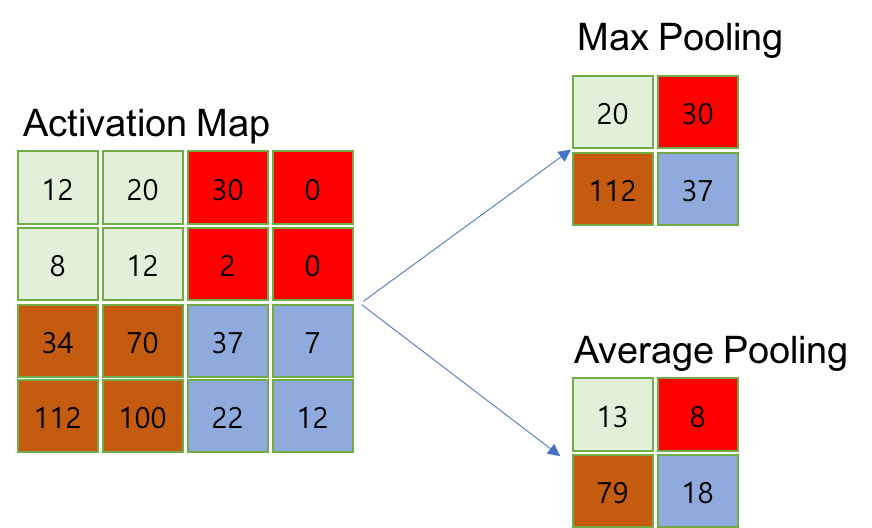


- 컨볼류션 레이어의 출력 데이터를 입력으로 받아서 출력 데이터(Activation Map)의 크기를 줄이거나 특정 데이터를 강조하는 용도
- Max Pooling과 Average Pooling
- CNN에서는 주로 Max Pooling사용.
이는 뉴런이 가장 큰 신호에 반응하는것과 유사 
이렇게 하면 노이즈가 감소하고 속도가 빨라지며 영상의 분별력이 좋아짐.



- convolution layer와 차이
  - 학습대상 파라미터가 없음
  - Pooling 레이어를 통과하면 행렬의 크기 감소
  - Pooling 레이어를 통해서 채널 수 변경 없음

### 출력 데이터 계산

- 입력 데이터 높이: H
- 입력 데이터 폭: W
- 필터 높이: FH
- 필터 폭: FW
- Strid 크기: S
- 패딩 사이즈: P

$$ OutputHeight = {(H+2P-FH) \over S} +1 $$
$$ OutputWeight = {(H+2P-FW) \over S} +1 $$

단 결과는 자연수

## 참고 자료
- https://sdc-james.gitbook.io/onebook/4.-and/5.4.-tensorflow/5.4.2.-cnn-convolutional-neural-network
https://codetorial.net/tensorflow/convolutional_neural_network.html
- https://zereight.tistory.com/227 (강추)
- https://pinkwink.kr/1121

# 데모 1(cnn) : Mnist classification

- 출처 : https://codetorial.net/tensorflow/convolutional_neural_network.html

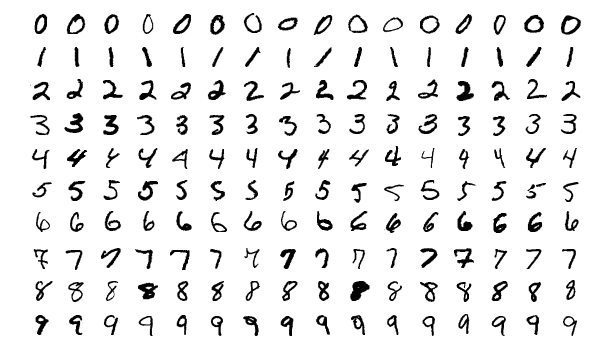

In [99]:
# 기본 세팅
from matplotlib import rcParams, pyplot as plt
import pandas as pd
import warnings
rcParams['figure.figsize'] = (16, 8)
# plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [27]:
# 필요한 라이브러리
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd

In [15]:
# 1. MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [16]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [33]:
# lables
pd.DataFrame(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [18]:
# 2. 데이터 전처리하기
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

In [19]:
# 3. 합성곱 신경망 구성하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Conv2D(32, ...) 에서의 32는 32개의 필터를 적용하여 다음 층에서는 채널이 총 32개가 되도록 만든다.
# param = filter_size * input_channel * output_channel + output_channel_bias => ex) 3*3 * 1 * 32 + 32  
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [20]:
# 4. Dense 층 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [21]:
# #다른방법으로 모델 구성
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2, 2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [35]:
# 5. 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


- categorical_crossentropy ; 다중 분류 손실함수. one-hot encoding 클래스
  - 출력값이 one-hot encoding 된 결과로 나오고 실측 결과와의 비교시에도 실측 결과는 one-hot encoding 형태로 구성된다. 예를 들면 출력 실측값이 아래와 같은 형태(one-hot encoding)로 만들어 줘야 하는 과정을 거쳐야 한다.
 

- sparse_categorical_crossentropy : 다중 분류 손실함수. 위와 동일하지만 , integer type 클래스 ,출력 실측값이 아래와 같은 형태로 one-hot encoding 과정을 하지 않아도 된다. 

ex) [0, 1, 2]  (배치 사이즈 3개로 했을 때)

출처: https://crazyj.tistory.com/153

In [23]:
# 6. 훈련하기
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.4542 - accuracy: 0.8579
Epoch 2/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0768 - accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0518 - accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0373 - accuracy: 0.9893
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0311 - accuracy: 0.9904


In [24]:
# 7. 모델 평가하기
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.0716 - accuracy: 0.9773


[4145, 8062, 3797, 8860, 2550, 6450, 339, 458, 4791, 2927, 6964, 6123, 4984, 227, 6907, 3920]


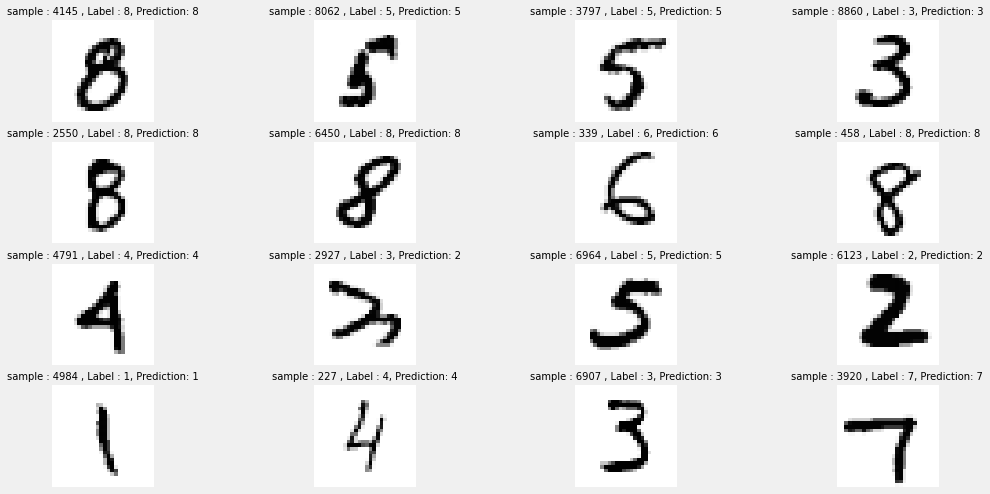

In [108]:
# 8. 모델 적용하기
# 임의의 samples을 뽑아 라벨과 예측한 부분 파악하기
import random
import matplotlib.pyplot as plt

samples = random.choices(population = range(test_images.shape[0]), k =16)

row = col = 4
cnt = 1
print(samples)
for i in samples:
  plt.subplot(row, col, cnt)
  cnt +=1
  title = "sample : {} , Label : {}, Prediction: {}".format(i,str(test_labels[i]), 
          str(np.argmax(model.predict(test_images[i].reshape((1,28, 28,1))))))
  plt.title(title, fontdict = {'fontsize' : 10})
  plt.imshow(test_images[i].reshape(28,28), cmap = 'Greys')
  plt.grid(False)
  plt.axis(False)


# 데모 2(cnn-emb)

## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# pip libruary update
!pip install -U pip
!pip install -U pandas
!pip install -U scikit-learn
!pip install -U tensorflow

     |████████████████████████████████| 1.5MB 5.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [5]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import re
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalMaxPooling1D, Conv1D, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.optimizers import Adam
import warnings 
warnings.filterwarnings(action='ignore')

In [6]:
# gpu setting
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)
else:
    print('No GPU detected')

No GPU detected


In [7]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [8]:
from google.colab import drive # colab과 구글 드라이브 연동
drive.mount('/content/drive', force_remount=True)
"""
- force_remount=True 는 강제적으로 mount를 재개할 때 사용. 
- 또한 drive 내 다른 폴더를 mount point로 지정할 수는 없음
"""

Mounted at /content/drive


'\n- force_remount=True 는 강제적으로 mount를 재개할 때 사용. \n- 또한 drive 내 다른 폴더를 mount point로 지정할 수는 없음\n'

## 학습데이터 로드

In [17]:
data_dir = Path('./drive/MyDrive/kaggle_study/data/author_classification')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test_x.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'author'
n_fold = 5
n_class = 5
seed = 42

In [18]:
algo_name = 'cnn'
feature_name = 'emb'
model_name = f'{algo_name}_{feature_name}'

# feature_file = feature_dir / f'{feature_name}.csv'
# p_val_file = val_dir / f'{model_name}.val.csv'
# p_tst_file = tst_dir / f'{model_name}.tst.csv'
sub_file = data_dir / f'{model_name}.csv'

In [19]:
train = pd.read_csv(trn_file, index_col=0)
train.head()

,text,author
index,,
0,"He was almost choking. There was so much, so m...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in per...",1
3,"The captain was in the porch, keeping himself ...",4
4,"“Have mercy, gentlemen!” odin flung up his han...",3


In [20]:
test = pd.read_csv(tst_file, index_col=0)
test.head()

,text
index,
0,“Not at all. I think she is one of the most ch...
1,"""No,"" replied he, with sudden consciousness, ""..."
2,As the lady had stated her intention of scream...
3,“And then suddenly in the silence I heard a so...
4,His conviction remained unchanged. So far as I...


## Preprocessing

In [22]:
# text 전처리

#알파벳과 숫자를 제외한 것을 전처리
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# stopwords 제거
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)


stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [23]:
train['text'] = train['text'].str.lower().apply(alpha_num).apply(remove_stopwords)
test['text'] = test['text'].str.lower().apply(alpha_num).apply(remove_stopwords)

In [24]:
# target과 분리
X_train = train['text'].values
X_test = test['text'].values
y = train['author'].values
print(X_train.shape, X_test.shape, y.shape)

(54879,) (19617,) (54879,)


In [25]:
X_train[:3]

array(['almost choking much much wanted say strange exclamations came lips pole gazed fixedly bundle notes hand looked odin evident perplexity',
       'sister asked suppose',
       'engaged one day walked perusing janes last letter dwelling passages proved jane not written spirits instead surprised mr odin saw looking odin meeting putting away letter immediately forcing smile said'],
      dtype=object)

## Training

In [26]:
vocab_size = 20000
embedding_dim = 64
max_length = 500
padding_type='post'

In [27]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [28]:
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [30]:
trn = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)
tst = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)
print(trn.shape, tst.shape)

(54879, 500) (19617, 500)


In [29]:
# cross validation setting
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [31]:
Conv1D?

In [34]:
def get_model():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Dropout(.5),
        Conv1D(128, 7, padding="valid", activation="relu", strides=3), #  `"valid"` means no padding
        Conv1D(128, 7, padding="valid", activation="relu", strides=3),    
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dropout(.5),
        Dense(n_class, activation='softmax')
    ])
     
    # compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=.005))
    return model

In [35]:
p_val = np.zeros((trn.shape[0], n_class))
p_tst = np.zeros((tst.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(trn, y), 1):
    print(f'training model for CV #{i}')
    es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3,
                       verbose=1, mode='min', baseline=None, restore_best_weights=True)

    clf = get_model()    
    clf.fit(trn[i_trn], 
            to_categorical(y[i_trn]),
            validation_data=(trn[i_val], to_categorical(y[i_val])),
            epochs=10,
            batch_size=512,
            callbacks=[es])
    p_val[i_val, :] = clf.predict(trn[i_val])
    p_tst += clf.predict(tst) / n_fold

training model for CV #1
Epoch 1/10
86/86 [==============================] - 134s 2s/step - loss: 1.4954 - val_loss: 1.0995
Epoch 2/10
86/86 [==============================] - 133s 2s/step - loss: 1.0161 - val_loss: 0.8821
Epoch 3/10
86/86 [==============================] - 133s 2s/step - loss: 0.7096 - val_loss: 0.8118
Epoch 4/10
86/86 [==============================] - 133s 2s/step - loss: 0.5510 - val_loss: 0.8205
Epoch 5/10
86/86 [==============================] - 133s 2s/step - loss: 0.4672 - val_loss: 0.8251
Epoch 6/10
86/86 [==============================] - 133s 2s/step - loss: 0.4052 - val_loss: 0.9038
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping
training model for CV #2
Epoch 1/10
86/86 [==============================] - 133s 2s/step - loss: 1.4768 - val_loss: 1.0626
Epoch 2/10
40/86 [============>.................] - ETA: 1:08 - loss: 0.9701

KeyboardInterrupt: ignored

In [ ]:
print(f'Accuracy (CV): {accuracy_score(y, np.argmax(p_val, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y), p_val):8.4f}')

In [ ]:
# save txt
np.savetxt(p_val_file, p_val, fmt='%.6f', delimiter=',')
np.savetxt(p_tst_file, p_tst, fmt='%.6f', delimiter=',')

## 시각화

In [ ]:
# model summary
print(clf.summary())

In [ ]:
plot_model(clf)

## 제출 파일 생성

In [ ]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

In [ ]:
sub[sub.columns] = p_tst
sub.head()

In [ ]:
sub.to_csv(sub_file)